<a href="https://colab.research.google.com/github/Akshithakarampuri/Gen-AI-2025/blob/main/GenAI_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.0000e+00 - loss: -20.9840 - val_accuracy: 0.0000e+00 - val_loss: -21.0991
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -21.2660 - val_accuracy: 0.0000e+00 - val_loss: -21.1453
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -21.4762 - val_accuracy: 0.0000e+00 - val_loss: -21.1925
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -21.0078 - val_accuracy: 0.0000e+00 - val_loss: -21.2407
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -21.9001 - val_accuracy: 0.0000e+00 - val_loss: -21.2899
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -21.1209 - val_accuracy: 0.0000e+00 - val_loss: -21.3399
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -21.6348 - val_accuracy: 0.0000e+00 - val_loss: -21.3907
Epoch 8/100
20/20 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Model saved as 'wine_quality_model.h5'
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Loaded model test accuracy: 0.00%


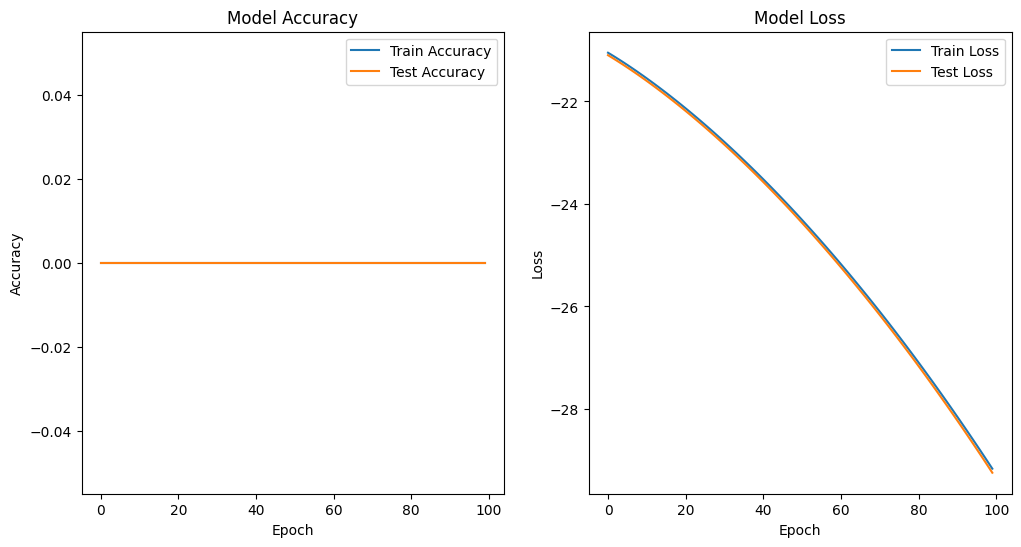

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adadelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Step 1: Load Dataset
url = '/content/winequality-red.csv'
data = pd.read_csv(url)

# Check the first few rows of the dataset
print(data.head())

# Step 2: Preprocess the data
# Assuming the dataset is already clean and numerical. If not, we'll handle it here.
# The label column is assumed to be the last column (wine quality).

X = data.iloc[:, :-1].values  # Features (all columns except the last one)
y = data.iloc[:, -1].values   # Labels (last column - wine quality)

# Convert to numeric if necessary
X = np.array(X).astype(np.float32)
y = np.array(y).astype(np.int32)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Design the ANN architecture
model = Sequential()

# Hidden Layer 1
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))

# Hidden Layer 2
model.add(Dense(20, activation='relu'))

# Hidden Layer 3
model.add(Dense(25, activation='relu'))

# Hidden Layer 4
model.add(Dense(10, activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification (good or bad quality)

# Step 5: Compile the model
model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Step 7: Evaluate the model
y_pred = (model.predict(X_test) > 0.5)  # Convert predictions to binary values

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Step 8: Save the model
model.save('wine_quality_model.h5')
print("Model saved as 'wine_quality_model.h5'")

# Step 9: Load the Saved Model (for Deployment)
loaded_model = load_model('wine_quality_model.h5')

# Test the loaded model (optional)
loaded_model_predictions = (loaded_model.predict(X_test) > 0.5)
print(f"Loaded model test accuracy: {accuracy_score(y_test, loaded_model_predictions) * 100:.2f}%")

# Optional: Plot training history (loss and accuracy)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
